## Web Scraping Project 
by 
#### Ameenah Al-Haidari - Sep 10, 2023

# Grand-Seiko

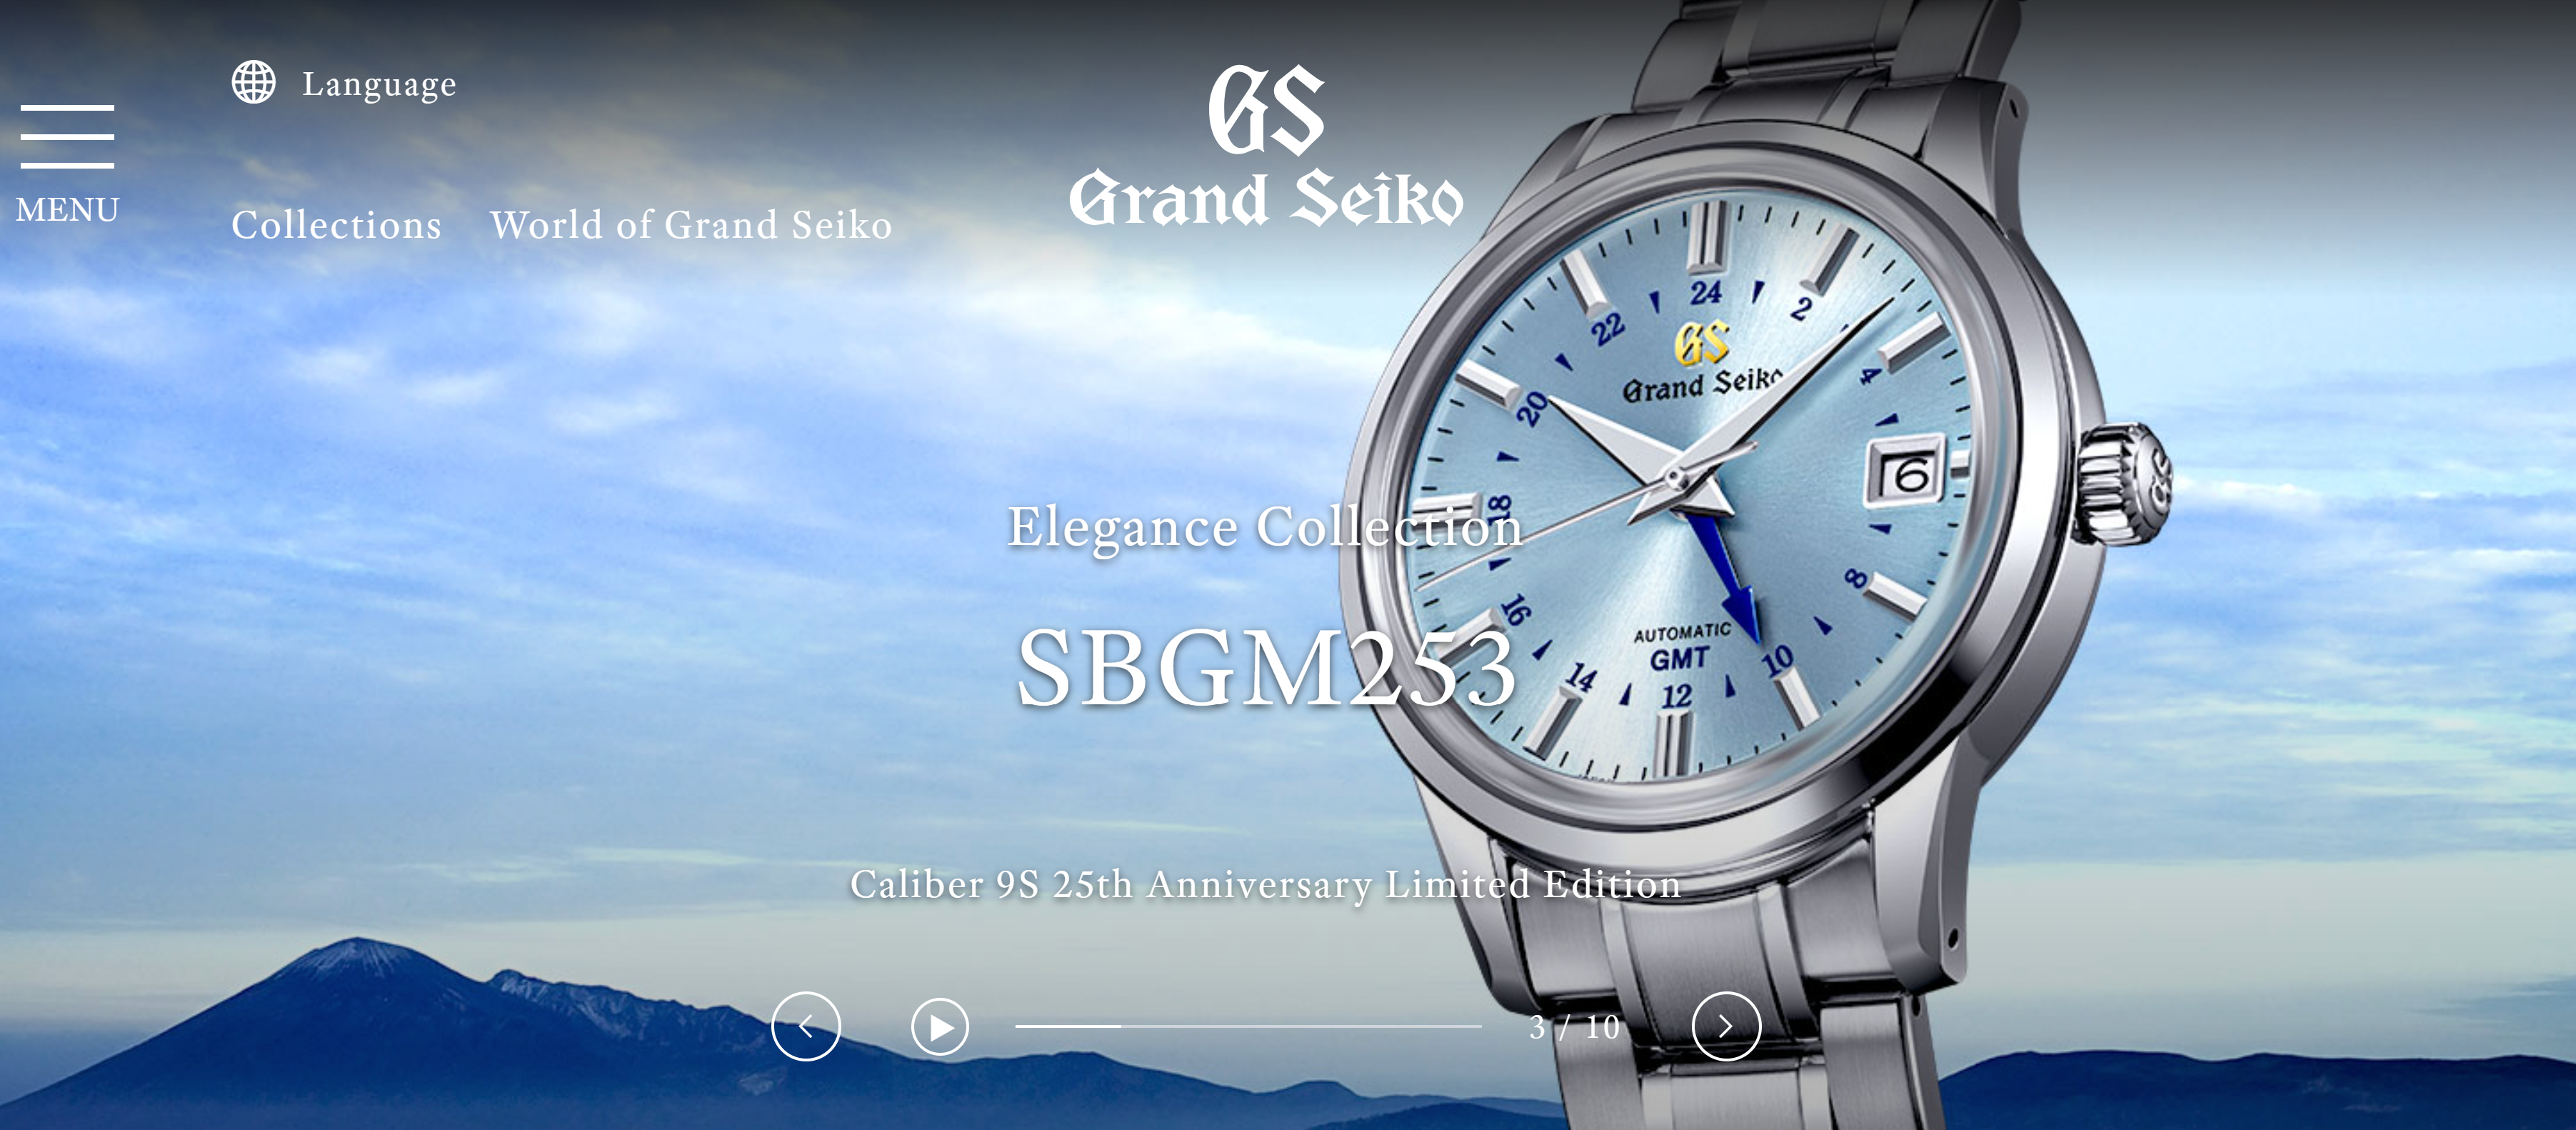

### import Libraries

In [65]:
import pandas as pd
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [66]:
# Initialize the web driver
driver = webdriver.Chrome()  # You can use other browsers too
wait = WebDriverWait(driver, 10)  # Set a maximum wait time for locating elements

In [67]:
# Open the initial page
# url = "https://www.grand-seiko.com/ca-en/collections/all?page=1"
url = "https://www.grand-seiko.com/ca-en/collections/all?page=7"
driver.get(url)

In [68]:
# Scroll to load all watches
SCROLL_PAUSE_TIME = 2

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

In [69]:
# Find and extract watch links
watch_links = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a.productCard')))
watch_urls = [link.get_attribute("href") for link in watch_links]

In [70]:
# Initialize CSV file for saving data
csv_filename = "AAgrandseiko_result.csv"
csv_headers = ["url", "Limited edition", "Reference Number", "Date", "collection", "Description", "Exterior:",
               "Case back:", "Glass", "Glass Material:", "Glass Coating:", "Case size:", "Band width:", "Band Material:", "Clasp type:","Movement", "Caliber no.:", "Accuracy:", "Functions", "Water resistance:", "Magnetic resistance:",
               "Other details / Features:", "url of images"]

In [71]:
with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(csv_headers)

    # Iterate through each watch page
    for watch_url in watch_urls:
        driver.get(watch_url)
        watch_data = {"url": watch_url}
        try:
            watch_data["Reference Number"] = driver.find_element(By.CSS_SELECTOR, "h1._title").text
        except Exception as e:
            watch_data["Reference Number"] = "N/A"

            
        try:
            watch_data["Date"] = driver.find_element(By.CSS_SELECTOR, "p._arrival").text
        except Exception as e:
            watch_data["Date"] = "N/A"
            
        try:
            watch_data["Limited edition"] = driver.find_element(By.XPATH,
                                                                "//span[contains(text(), 'Limited')]")
            watch_data['Limited edition'] = watch_data['Limited edition'].text
        except Exception as e:
                watch_data["Limited edition"] = "N/A"
                
        try:
            watch_data["collection"] = driver.find_element(By.CSS_SELECTOR, "p._collection").text
        except Exception as e:
            watch_data["collection"] = "N/A"
            
        try:
            watch_data["Description"] = driver.find_element(By.CSS_SELECTOR, "p._shoulder").text
        except Exception as e:
            watch_data["Description"] = "N/A"


        table_rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'table._table tr')))
        for row in table_rows:
            value = row.find_element(By.TAG_NAME, 'td').text.strip()
            try:
                if row.find_element(By.TAG_NAME, 'th').text.strip():
                    header = row.find_element(By.TAG_NAME, 'th').text.strip()
                watch_data[header] = value
            except Exception as e:
                watch_data[header] += value

        # ... continue extracting other features
        image_urls = [img.get_attribute("src") for img in
                      driver.find_elements(By.CSS_SELECTOR, 'img[loading="lazy"]')]
        watch_data["url of images"] = ", ".join(image_urls)
        # Write the extracted data to the CSV file
        csv_writer.writerow([watch_data.get(header, "") for header in csv_headers])

# Close the web driver
driver.quit()


In [75]:
pd.read_csv("AAgrandseiko_result.csv")

url  \
0    https://www.grand-seiko.com/ca-en/collections/...   
1    https://www.grand-seiko.com/ca-en/collections/...   
2    https://www.grand-seiko.com/ca-en/collections/...   
3    https://www.grand-seiko.com/ca-en/collections/...   
4    https://www.grand-seiko.com/ca-en/collections/...   
..                                                 ...   
114  https://www.grand-seiko.com/ca-en/collections/...   
115  https://www.grand-seiko.com/ca-en/collections/...   
116  https://www.grand-seiko.com/ca-en/collections/...   
117  https://www.grand-seiko.com/ca-en/collections/...   
118  https://www.grand-seiko.com/ca-en/collections/...   

                  Limited edition Reference Number               Date  \
0    Limited edition of 1,700 pcs          SBGM253  Oct. 2023 Release   
1    Limited edition of 2,000 pcs          SBGJ275  Sep. 2023 Release   
2                             NaN          STGK019                NaN   
3                             NaN          SBGA481                NaN   
4                             NaN          STGK021                NaN   
..                            ...              ...                ...   
114                           NaN          SBGM221                NaN   
115                           NaN          SBGW231                NaN   
116                           NaN          SBGR261                NaN   
117                           NaN          SBGA413                NaN   
118                           NaN          SBGA415                NaN   

              collection                                        Description  \
0    Elegance Collection  Automatic 3-Day Power Reserve GMT\nCaliber 9S ...   
1       Sport Collection  Mechanical Hi-Beat 36000 GMT\nCaliber 9S 25th ...   
2    Elegance Collection                                                NaN   
3       Sport Collection                                                NaN   
4    Elegance Collection                                                NaN   
..                   ...                                                ...   
114  Elegance Collection                                                NaN   
115  Elegance Collection                                                NaN   
116  Elegance Collection                                                NaN   
117  Heritage Collection                                                NaN   
118  Heritage Collection                                                NaN   

                                             Exterior:  \
0                                      Stainless steel   
1    Stainless steel, Caseback:Stainless steel and ...   
2                                      Stainless steel   
3                              High-intensity titanium   
4                                      Stainless steel   
..                                                 ...   
114                                    Stainless steel   
115                                    Stainless steel   
116                                    Stainless steel   
117                            High-intensity titanium   
118                            High-intensity titanium   

                                       Case back:  Glass  \
0    See-through case backCase back with 6 screws    NaN   
1                   See-through & Screw case back    NaN   
2                   See-through & Screw case back    NaN   
3                   See-through & Screw case back    NaN   
4                   See-through & Screw case back    NaN   
..                                            ...    ...   
114  See-through case backCase back with 6 screws    NaN   
115  See-through case backCase back with 6 screws    NaN   
116  See-through case backCase back with 6 screws    NaN   
117                 See-through & Screw case back    NaN   
118                 See-through & Screw case back    NaN   

                  Glass Material:  ...     Band Material:  \
0     Box shaped sapphire crystal  ...           

### the End